<a href="https://colab.research.google.com/github/syedmahmoodiagents/Agents/blob/main/LLM_Messages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain langchain-core langchain-community langchain-openai --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.8/450.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-classic 1.0.0 requires langchain-core<2.0.0,>=1.0.0, but you have langchain-core 0.3.80 which is incompatible.
langchain-classic 1.0.0 requires langchain-text-splitters<2.0.0,>=1.0.0, but you have langchain-text-splitters 0.3.11 which is incompatible.


In [ ]:
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage, SystemMessage, ChatMessage, FunctionMessage

In [ ]:
# from langchain.schema import HumanMessage, AIMessage, SystemMessage

In [ ]:
import os, getpass

In [ ]:
os.environ['OPENAI_API_KEY'] = getpass.getpass()

In [ ]:
from langchain_openai import ChatOpenAI

In [ ]:
llm = ChatOpenAI(model="gpt-4o-mini")

In [ ]:
# llm.invoke("what is the capital of india")

In [ ]:
from pydantic import BaseModel
from langchain.output_parsers import PydanticOutputParser
from langchain.prompts import ChatPromptTemplate

In [ ]:
class Joke(BaseModel):
    question: str
    answer: str

In [ ]:
parser = PydanticOutputParser(pydantic_object=Joke)

In [ ]:
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a joke-telling bot."),
    ("system", "{format_instructions}"),
    ("human", "Tell me a short joke.")
])

In [ ]:
# prompt.format_prompt()

In [ ]:
# msgs = prompt.format_prompt().to_messages()

In [ ]:
struct = llm.with_structured_output(Joke)

In [ ]:
chain = prompt | struct

In [ ]:
response = chain.invoke({"format_instructions": parser.get_format_instructions()})

In [ ]:
response

Joke(question="Why don't scientists trust atoms?", answer='Because they make up everything!')

In [ ]:
response.question

"Why don't scientists trust atoms?"

In [ ]:
response.answer

'Because they make up everything!'

# Pydantic under the hood

In [ ]:
# HumanMessage is a Pydantic model
msg = HumanMessage(content="Hello, how are you?")

In [ ]:

print(msg.model_dump())

{'content': 'Hello, how are you?', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'human', 'name': None, 'id': None, 'example': False}


In [ ]:
msg.model_dump_json()

'{"content":"Hello, how are you?","additional_kwargs":{},"response_metadata":{},"type":"human","name":null,"id":null,"example":false}'

# More Examples

In [ ]:
# messages = [SystemMessage(content="You are a math tutor.")]

In [ ]:
messages = [
    SystemMessage(content="You are a math tutor."),
    HumanMessage(content="Can you explain Pythagoras theorem?"),
    AIMessage(content="Sure! It states that in a right triangle, a² + b² = c²."),
]


In [ ]:
# messages.append(HumanMessage(
#     name="question",
#     content="what is the square root of 16."
# ))

In [ ]:
messages.append(FunctionMessage(
    name="calculator",
    content="The square root of 16 is 4."
))

In [ ]:
messages

[SystemMessage(content='You are a math tutor.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Can you explain Pythagoras theorem?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Sure! It states that in a right triangle, a² + b² = c².', additional_kwargs={}, response_metadata={}),
 FunctionMessage(content='The square root of 16 is 4.', additional_kwargs={}, response_metadata={}, name='calculator')]

In [ ]:
from pydantic import BaseModel
from typing import List

In [ ]:
class Conversation(BaseModel):
    messages: List[BaseMessage]

In [ ]:
Conversation(messages=messages)

Conversation(messages=[SystemMessage(content='You are a math tutor.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Can you explain Pythagoras theorem?', additional_kwargs={}, response_metadata={}), AIMessage(content='Sure! It states that in a right triangle, a² + b² = c².', additional_kwargs={}, response_metadata={}), FunctionMessage(content='The square root of 16 is 4.', additional_kwargs={}, response_metadata={}, name='calculator')])

In [ ]:
conv = Conversation(messages=[
    HumanMessage(content="What is 2+2?"),
    AIMessage(content="It is 4."),
])

In [ ]:
print(conv.json())

{"messages":[{"content":"What is 2+2?","additional_kwargs":{},"response_metadata":{},"type":"human","name":null,"id":null},{"content":"It is 4.","additional_kwargs":{},"response_metadata":{},"type":"ai","name":null,"id":null}]}


/tmp/ipython-input-2278861803.py:1: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  print(conv.json())


In [ ]:
conv.model_dump()

{'messages': [{'content': 'What is 2+2?',
   'additional_kwargs': {},
   'response_metadata': {},
   'type': 'human',
   'name': None,
   'id': None},
  {'content': 'It is 4.',
   'additional_kwargs': {},
   'response_metadata': {},
   'type': 'ai',
   'name': None,
   'id': None}]}

In [ ]:
# from langchain.schema import (
#     BaseMessage,
#     HumanMessage,
#     AIMessage,
#     SystemMessage,
#     ChatMessage,
#     FunctionMessage
# )

In [ ]:
messages = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content="What is the capital of France?"),
]

In [ ]:
response = llm.invoke(messages)

In [ ]:
response

AIMessage(content='The capital of France is Paris.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 24, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-Cdwyrfc1nhyMHMzQD9jBDgdRDcio9', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--a439c3d3-c5f4-4d83-8937-5e5dff0034b5-0', usage_metadata={'input_tokens': 24, 'output_tokens': 7, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
print(response.content)

The capital of France is Paris.


# Where is this style helpful ?

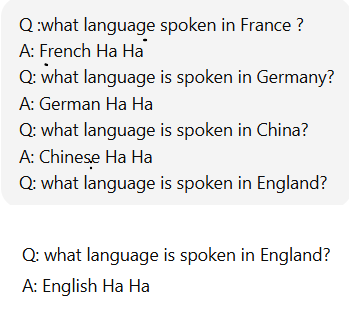

In [ ]:
prompt = """
You are a helpful assistant that answers in one sentence.

Q: What is the capital of France?
A: The capital of France is Paris.
Q: What is the capital of Germany?
A: The capital of Germany is Berlin.
Q: What is the capital of Italy?
A:
"""


In [ ]:
response = llm.invoke(prompt)

/tmp/ipython-input-403075660.py:1: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm.predict(prompt)


In [ ]:
print(response)

The capital of Italy is Rome.


# Structured Messages

In [ ]:
# from langchain_core.messages import BaseMessage, HumanMessage, AIMessage, SystemMessage, ChatMessage, FunctionMessage

In [ ]:
messages = [
    SystemMessage(content="You are a helpful assistant that answers in one sentence."),

    HumanMessage(content="What is the capital of France?"),
    AIMessage(content="The capital of France is Paris."),

    HumanMessage(content="What is the capital of Germany?"),
    AIMessage(content="The capital of Germany is Berlin."),

    HumanMessage(content="What is the capital of Italy?")
]

In [ ]:
response = llm.invoke(messages)

In [ ]:
response

AIMessage(content='The capital of Italy is Rome.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 73, 'total_tokens': 80, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CdxMto3NOx8uIbiyt46Tp1CNe8oUY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c3772917-9feb-4883-9414-69c5f20e8ca2-0', usage_metadata={'input_tokens': 73, 'output_tokens': 7, 'total_tokens': 80, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
print(response.content)

The capital of Italy is Rome.


# Multi-Turn Conversation

In [ ]:
messages = [
    SystemMessage(content="You are a friendly tutor who explains concepts simply."),
    HumanMessage(content="Explain Newton's first law."),
]

In [ ]:
response1 = llm.invoke(messages)

In [ ]:
print("AI:", response1.content)

AI: Sure! Newton's first law of motion, also known as the law of inertia, states that an object will stay at rest or keep moving at a constant velocity in a straight line unless acted upon by a net external force. 

In simpler terms, this means:

1. If something is not moving (at rest), it won’t start moving unless something pushes or pulls it.
2. If something is already moving, it won’t stop or change direction unless something else (like friction or a collision) affects it.

The key idea here is "inertia," which is the tendency of objects to resist changes in their state of motion. More massive objects have more inertia, making them harder to start or stop moving compared to lighter objects. 

So, if you're sitting in a car that suddenly stops, your body wants to keep moving forward because of inertia! That’s why wearing a seatbelt is important; it helps keep you secure in case of sudden stops.


In [ ]:
# Add AI's response to history
messages.append(AIMessage(content=response1.content))

In [ ]:
# Continue the conversation
messages.append(HumanMessage(content="Can you give me a real-world example?"))

In [ ]:
response2 = llm.invoke(messages)

In [ ]:
print("AI:", response2.content)

AI: Of course! A common real-world example of Newton's first law is when you're riding in a car.

Imagine you’re in a car that is moving down the highway at a steady speed. While the car is in motion, you feel comfortable and relaxed. But then the driver suddenly hits the brakes to stop the car. 

What happens? Your body wants to keep moving forward because of inertia. Unless there's an external force (like the seatbelt or the car itself stopping), you would continue moving forward. This is why it’s important to wear seatbelts—they provide the external force that keeps you safely secured in your seat instead of flying forward!

Another example is a book resting on a table. The book will stay there (at rest) until someone pushes it or picks it up. It won’t start sliding off the table on its own unless something makes it move. 

These situations illustrate how objects behave according to Newton's first law!


In [ ]:
# Add AI's response to history
messages.append(AIMessage(content=response2.content))

In [ ]:
# Another turn
messages.append(HumanMessage(content="How is it different from the second law?"))

In [ ]:
messages

[SystemMessage(content='You are a friendly tutor who explains concepts simply.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content="Explain Newton's first law.", additional_kwargs={}, response_metadata={}),
 AIMessage(content='Sure! Newton\'s first law of motion, also known as the law of inertia, states that an object will stay at rest or keep moving at a constant velocity in a straight line unless acted upon by a net external force. \n\nIn simpler terms, this means:\n\n1. If something is not moving (at rest), it won’t start moving unless something pushes or pulls it.\n2. If something is already moving, it won’t stop or change direction unless something else (like friction or a collision) affects it.\n\nThe key idea here is "inertia," which is the tendency of objects to resist changes in their state of motion. More massive objects have more inertia, making them harder to start or stop moving compared to lighter objects. \n\nSo, if you\'re sitting in a car that suddenly

In [ ]:
response3 = llm.invoke(messages)

In [ ]:
print("AI:", response3.content)

AI: Great question! Newton's first law and second law of motion are related but focus on different aspects of how objects behave.

### Newton's First Law (Law of Inertia)
As we discussed, the first law states that an object will remain at rest or keep moving in a straight line at a constant speed unless acted upon by an external force. It emphasizes the concept of inertia and how objects resist changes to their motion.

### Newton's Second Law
The second law builds on the first and provides a way to quantify the relationship between force, mass, and acceleration. It states that the acceleration of an object is directly proportional to the net external force acting on it and inversely proportional to its mass. This is usually written as the formula:

**F = ma**

Where:
- **F** is the net force acting on the object (in newtons),
- **m** is the mass of the object (in kilograms),
- **a** is the acceleration of the object (in meters per second squared).

### Key Differences
1. **Focus**:
  

# Using ConversationBufferMemory

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [ ]:
memory = ConversationBufferMemory()

/tmp/ipython-input-995385594.py:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()


In [ ]:
# Build a conversation chain with memory
conversation = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=True
)

/tmp/ipython-input-1556523444.py:2: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :class:`~langchain_core.runnables.history.RunnableWithMessageHistory` instead.
  conversation = ConversationChain(


In [ ]:
# First turn
response1 = conversation.invoke({"input": "Explain Newton's first law."})
print("AI:", response1)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Explain Newton's first law.
AI:

> Finished chain.
AI: {'input': "Explain Newton's first law.", 'history': '', 'response': "Newton's first law, often referred to as the law of inertia, states that an object at rest will remain at rest, and an object in motion will continue to move at a constant velocity in a straight line unless acted upon by a net external force. \n\nThis means that if no forces are acting on an object—like friction, gravity, or a push—it won’t change its state of motion. For instance, if you kick a soccer ball on a frictionless surface, it will keep rolling indefinitely without slowing down. Conversely, if a ball is sitting on the ground and 

In [ ]:
# Second turn (memory automatically keeps track)
response2 = conversation.invoke({"input": "Can you give me a real-world example?"})
print("AI:", response2)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Explain Newton's first law.
AI: Newton's first law, often referred to as the law of inertia, states that an object at rest will remain at rest, and an object in motion will continue to move at a constant velocity in a straight line unless acted upon by a net external force. 

This means that if no forces are acting on an object—like friction, gravity, or a push—it won’t change its state of motion. For instance, if you kick a soccer ball on a frictionless surface, it will keep rolling indefinitely without slowing down. Conversely, if a ball is sitting on the ground and no one touches it, it will stay there until some force causes it to move.

The concept of inert

In [ ]:
# Third turn
response3 = conversation.invoke({"input": "How is it different from the second law?"})
print("AI:", response3)




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Explain Newton's first law.
AI: Newton's first law, often referred to as the law of inertia, states that an object at rest will remain at rest, and an object in motion will continue to move at a constant velocity in a straight line unless acted upon by a net external force. 

This means that if no forces are acting on an object—like friction, gravity, or a push—it won’t change its state of motion. For instance, if you kick a soccer ball on a frictionless surface, it will keep rolling indefinitely without slowing down. Conversely, if a ball is sitting on the ground and no one touches it, it will stay there until some force causes it to move.

The concept of inert